In [ ]:
%pip install ipympl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import matplotlib.patches as mpatches
import os
import numpy as np
%matplotlib widget

std_path = os.path.join(
    os.path.dirname('__file__'),
    'out/out_data_std.csv'
)

sbs_path = os.path.join(
    os.path.dirname('__file__'),
    'out/out_data_sbs.csv'
)

chs_path = os.path.join(
    os.path.dirname('__file__'),
    'out/out_data_chs.csv'
)

In [2]:
std_data = pd.read_csv(std_path)
chs_data = pd.read_csv(chs_path)
sbs_data = pd.read_csv(sbs_path)

In [3]:
colors_std = [{p>=300: (0.5,0.5,0.5, 0.2), p<300: '#522A27'}[True] for p in std_data["solve time"].to_list()]
colors_sbs = [{p>=300: (0.5,0.5,0.5, 0.2), p<300: '#C73E1D'}[True] for p in sbs_data["solve time"].to_list()]
colors_chs = [{p>=300: (0.5,0.5,0.5, 0.2), p<300: '#C59849'}[True] for p in chs_data["solve time"].to_list()]
std_patch = mpatches.Patch(color='#522A27', label="Standard Solver")
sbs_patch = mpatches.Patch(color='#C73E1D', label="Simmetry Breaking solver")
chs_patch = mpatches.Patch(color='#C59849', label="Cumulative Height solver")
over5_patch = mpatches.Patch(color=(0.5,0.5,0.5,0.2), label="Over 5 min execution")

In [4]:
total_std_time = sum(std_data['solve time'].to_list())
total_sbs_time = sum(sbs_data['solve time'].to_list())
total_chs_time = sum(chs_data['solve time'].to_list())
mean_std = total_std_time/40
mean_sbs = total_sbs_time/40
mean_chs = total_chs_time/40

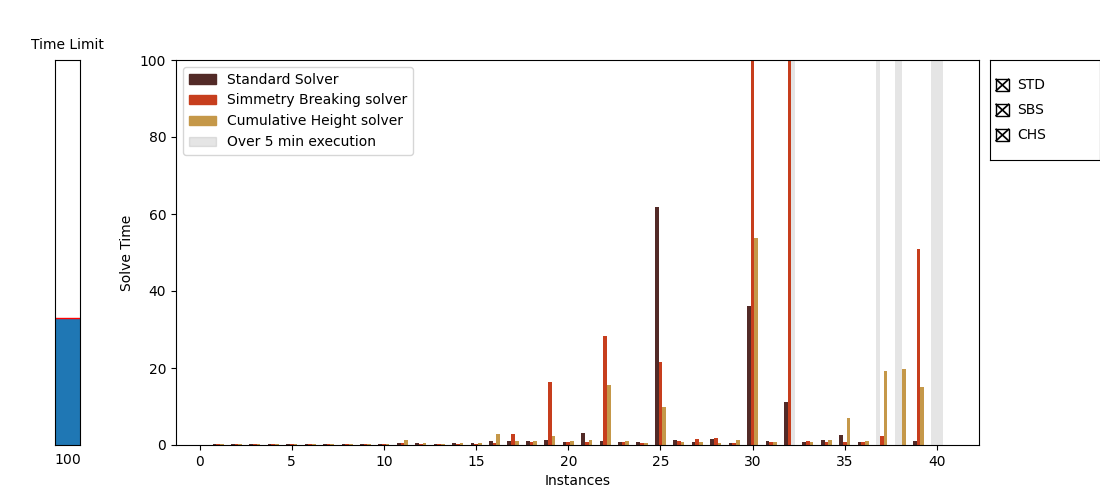

In [85]:
width=0.2
fig, ax = plt.subplots(figsize=(11,5))
index = np.arange(40)

ax.bar(index- width +1, std_data['solve time'].to_list(), width, color=colors_std, label="STD")
ax.bar(index +1, sbs_data['solve time'].to_list(), width, color=colors_sbs, label="SBS")
ax.bar(index + width +1, chs_data['solve time'].to_list(), width, color=colors_chs, label="CHS")


ax_checks = fig.add_axes([0.9, 0.68, 0.1, 0.2])
labels = [bar.get_label() for bar in ax.containers]
checks = widgets.CheckButtons(
    ax_checks,
    labels,
    [True, True, True]      
)

def checked(label):
    index = labels.index(label)
    for rect in ax.containers[index]:
        rect.set_visible(not rect.get_visible())   


checks.on_clicked(checked)


fig.subplots_adjust(left=0.16, right=0.89)

ax_ylim = fig.add_axes([0.05, 0.11, 0.0225, 0.77])
ylim_slider = widgets.Slider(
    ax=ax_ylim,
    label='Time Limit',
    valmin=2,
    valmax=300,
    valinit=100,
    orientation='vertical'
)

def update_slider(val):
    ax.set_ylim(0, ylim_slider.val)
    fig.canvas.draw_idle()

ylim_slider.on_changed(update_slider)

ax.set_ylabel("Solve Time")
ax.set_xlabel("Instances")
ax.set_ylim(0,100)
ax.legend(handles=[std_patch, sbs_patch, chs_patch, over5_patch])

plt.show()